In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2024-04-19 05:07:49--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.207, 142.251.170.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  21.0MB/s    in 3.1s    

2024-04-19 05:07:52 (21.0 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Constant for epochs
EPOCHS = 20

In [9]:
# # Constant for epochs
# EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 6s - loss: 0.6919 - accuracy: 0.5205 - val_loss: 0.6788 - val_accuracy: 0.5820 - 6s/epoch - 61ms/step
Epoch 2/20
100/100 - 6s - loss: 0.6716 - accuracy: 0.5795 - val_loss: 0.6886 - val_accuracy: 0.5470 - 6s/epoch - 55ms/step
Epoch 3/20
100/100 - 6s - loss: 0.6432 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6480 - 6s/epoch - 57ms/step
Epoch 4/20
100/100 - 6s - loss: 0.6068 - accuracy: 0.6655 - val_loss: 0.5923 - val_accuracy: 0.6840 - 6s/epoch - 55ms/step
Epoch 5/20
100/100 - 5s - loss: 0.5695 - accuracy: 0.6985 - val_loss: 0.6750 - val_accuracy: 0.5970 - 5s/epoch - 46ms/step
Epoch 6/20
100/100 - 6s - loss: 0.5483 - accuracy: 0.7195 - val_loss: 0.5974 - val_accuracy: 0.6830 - 6s/epoch - 57ms/step
Epoch 7/20
100/100 - 5s - loss: 0.5282 - accuracy: 0.7320 - val_loss: 0.5556 - val_accuracy: 0.7300 - 5s/epoch - 47ms/step
Epoch 8/20
100/100 - 6s - loss: 0.5124 - accuracy: 0.7590 - val_loss: 0.5478 - val_accuracy: 0.7110 - 6s/epoch - 58ms/step
Epoch 9/20
100/1

In [10]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

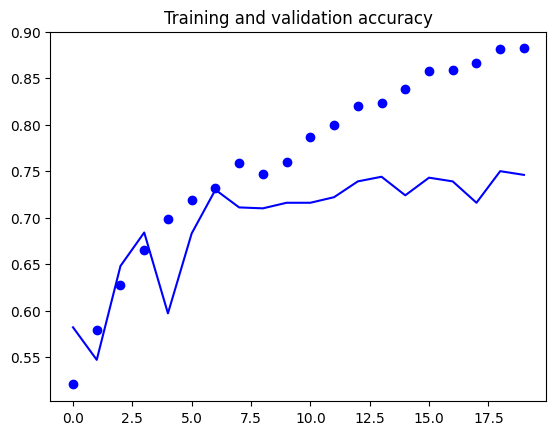

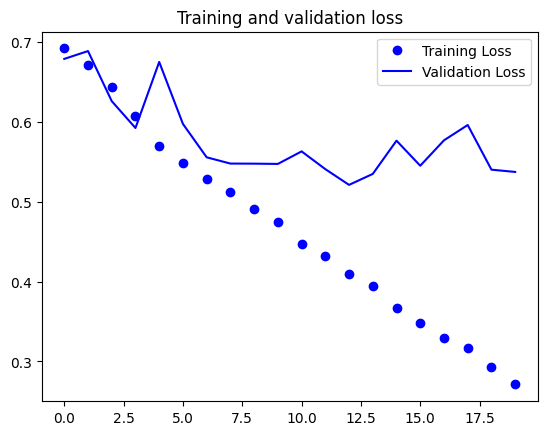

In [11]:
# Plot thraining result
plot_loss_acc(history)

## Data Augmentation

In [13]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir, # this is the source directory for training images
    target_size=(150, 150), # All images will be resized to 150x150
    batch_size=20,
    class_mode='binary' # using binary_crossentropy, so we need binary labels
)

# Flow validation images in batches of 20 using validation_datagen generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir, # this is the source directory for validation images
    target_size=(150, 150), # All images will be resized to 150x150
    batch_size=20,
    class_mode='binary' # using binary_crossentropy, so we need binary labels
)

# Train the new model
history_with_aug = model_for_aug.fit(
    train_generator,
    steps_per_epoch=100, # 2000 images = batch_size * steps
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=50, # 1000 images = batch_size * steps
    verbose=2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 17s - loss: 0.6924 - accuracy: 0.5200 - val_loss: 0.6860 - val_accuracy: 0.5010 - 17s/epoch - 169ms/step
Epoch 2/20
100/100 - 15s - loss: 0.6851 - accuracy: 0.5325 - val_loss: 0.6678 - val_accuracy: 0.5630 - 15s/epoch - 145ms/step
Epoch 3/20
100/100 - 14s - loss: 0.6721 - accuracy: 0.5720 - val_loss: 0.6505 - val_accuracy: 0.6060 - 14s/epoch - 143ms/step
Epoch 4/20
100/100 - 14s - loss: 0.6690 - accuracy: 0.5715 - val_loss: 0.6414 - val_accuracy: 0.6220 - 14s/epoch - 143ms/step
Epoch 5/20
100/100 - 14s - loss: 0.6516 - accuracy: 0.5995 - val_loss: 0.6271 - val_accuracy: 0.6620 - 14s/epoch - 143ms/step
Epoch 6/20
100/100 - 14s - loss: 0.6355 - accuracy: 0.6285 - val_loss: 0.6135 - val_accuracy: 0.6720 - 14s/epoch - 142ms/step
Epoch 7/20
100/100 - 19s - loss: 0.6290 - accuracy: 0.6375 - val_loss: 0.5964 - val_accuracy: 0.6750 - 19s/epoch - 189ms/step
Epoch 8/20
100/100 - 15s - loss: 0

In [14]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

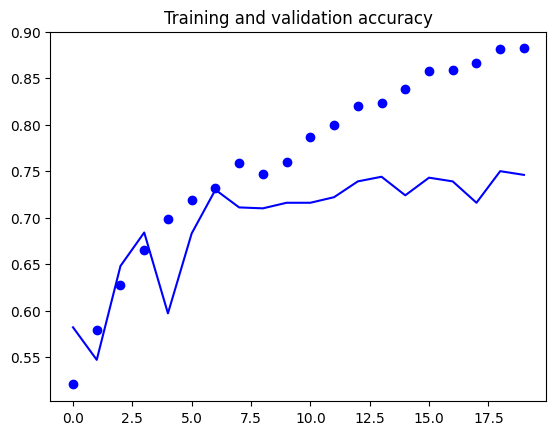

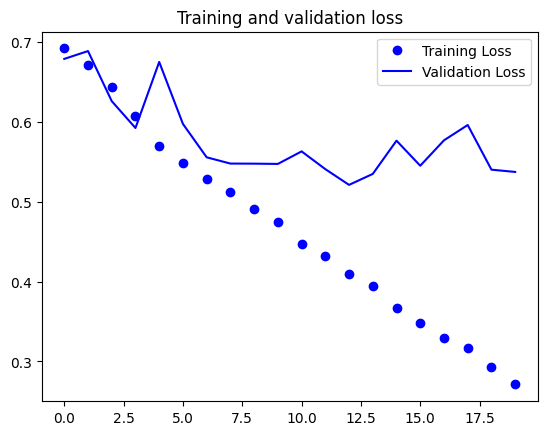

In [15]:
# Plot thraining result
plot_loss_acc(history)